In [8]:
# 라이브러리 호출
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [9]:
# fashion_mnist 데이터셋 내려받기
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

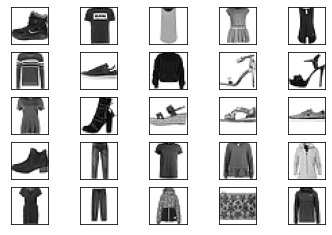

In [10]:
# 분류에 사용될 클래스 정의
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ancle boot']

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
plt.show()

In [11]:
# 심층 신경망을 이용한 모델 생성 및 훈련
x_train, x_test = x_train / 255.0, x_test / 255.0

# 모델 생성
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),    # 이미지를 1차원 데이터로 변형
    tf.keras.layers.Dense(128, activation='relu'),   # 입력층과 출력층을 연결. 활성화함수: relu
    tf.keras.layers.Dropout(0.2),                    # 과적합방지로 입력데이터 노드의 20%를 무작위로 0으로 만듬
    tf.keras.layers.Dense(10, activation='softmax')  # 출력층 노드 수가 10개. 활성화함수: softmax
    
])

model. compile(optimizer='adam',                     # 옵티마이저: 신경망의 파라미터(w,b)를 학습에 어떻게 반영할지 결정하는 방법
              loss='sparse_categorical_crossentropy',# 손실함수
              metrics=['accuracy'])                  # 모델평가방법

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5294 - accuracy: 0.8114
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4000 - accuracy: 0.8541
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3687 - accuracy: 0.8647
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3441 - accuracy: 0.8740
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3318 - accuracy: 0.8770
313/313 - 0s - loss: 0.3553 - accuracy: 0.8736 - 396ms/epoch - 1ms/step


[0.3552577495574951, 0.8736000061035156]

### 이미지 데이터를 255로 나누는 이유

In [1]:
import numpy as np
from skimage.color import rgb2lab, rgb2gray, lab2rgb
from skimage.io import imread, imshow
import matplotlib.pyplot as plt

In [2]:
def print_image_summary(image, labels):
    print('-------------------------')
    print('Image Detales:')
    print('-------------------------')
    print(f'Image dimensions: {image.shape}')
    print('Channels:')
    
    if len(labels) == 1:
        image = image[..., np.newaxis]
    
    for i, lab in enumerate(labels):
        min_val = np.min(image[:, :, i])
        max_val = np.max(image[:, :, i])
        print(f'{lab} : min={min_val:.4f}, max{max_val:.4f}')

(-0.5, 453.5, 702.5, -0.5)

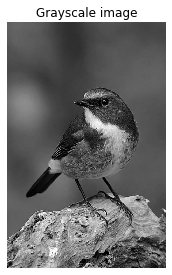

In [6]:
image_gs = imread('data/chap5/bird.jpg', as_gray=True)
fig, ax = plt.subplots(figsize=(3,4))
imshow(image_gs, ax=ax)
ax.set_title('Grayscale image')
ax.axis('off')

In [4]:
print_image_summary(image_gs, ['G'])

-------------------------
Image Detales:
-------------------------
Image dimensions: (703, 454, 3)
Channels:
G : min=0.0000, max255.0000


In [7]:
image_gs

array([[0.34578235, 0.34578235, 0.34578235, ..., 0.33854941, 0.33854941,
        0.34247098],
       [0.3653902 , 0.3653902 , 0.36931176, ..., 0.29933373, 0.29933373,
        0.29933373],
       [0.38051098, 0.38051098, 0.38051098, ..., 0.2909251 , 0.2909251 ,
        0.2909251 ],
       ...,
       [0.02101451, 0.00363882, 0.00083333, ..., 0.20292275, 0.20292275,
        0.22169725],
       [0.0092498 , 0.01008314, 0.03499647, ..., 0.22253059, 0.23037373,
        0.24914824],
       [0.00561098, 0.01008314, 0.06216471, ..., 0.23037373, 0.24213843,
        0.25782471]])

이미지 데이터는

### 다시 돌아와서 합성곱 네트워크로 모델을 생성해보자

In [13]:
# 데이터 전처리
X_train_final = x_train.reshape((-1, 28,28, 1)) / 255.
X_test_final = x_test.reshape((-1,28,28,1)) / 255.

In [16]:
# 합성곱 네트워크를 이용한 모델 생성
model_with_conv = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_with_conv.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
# 모델 훈련 및 성능 평가
model_with_conv.fit(X_train_final, y_train, epochs=5)
model_with_conv.evaluate(X_test_final, y_test, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 35s 18ms/step - loss: 0.8790 - accuracy: 0.6725
Epoch 2/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.5979 - accuracy: 0.7805
Epoch 3/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.5421 - accuracy: 0.8025
Epoch 4/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.5029 - accuracy: 0.8178
Epoch 5/5
1875/1875 [==============================] - 35s 18ms/step - loss: 0.4753 - accuracy: 0.8279
313/313 - 2s - loss: 0.4906 - accuracy: 0.8234 - 2s/epoch - 5ms/step


[0.49060502648353577, 0.8234000205993652]